## Ensemble Learning and Random Forests
------------------------
### Ensemble Learning
If you aggregatethe predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method. The class that gets majority votes from the different models will be the final prediction. 

For example, you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you just obtain the predictions of all individual trees, then predict the class that gets the most votes. Such an ensemble of Decision Trees is called a Random Forest, and despite its simplicity, this is one of the most powerful Machine Learning algorithms available today.

If each classifier is a weak learner, the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse.

<img src="https://cdn-images-1.medium.com/max/1000/0*c0Eg6-UArkslgviw.png" width="500" align="center"/> 

### Random Forests
- Bagging: use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating).
- The main difference between the decision tree algorithm and the random forest algorithm is that establishing root nodes and segregating nodes is done randomly in the latter. The random forest employs the bagging method to generate the required prediction.
- Bagging involves using different samples of data (training data) rather than just one sample. A training dataset comprises observations and features that are used for making predictions. The decision trees produce different outputs, depending on the training data fed to the random forest algorithm. These outputs will be ranked, and the highest will be selected as the final output.  

<img src="https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/random-forest-classifier.png" width="500" align="center"/> 


---------------------
### In Class Example
---------------------

We want to classify two classes in the dataset by using tree.

The libraries we will be using are:
* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)  

#### Dataset information
The dataset we will use is [make_moons dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) from sklearn.
We will make two interleaving half circles, and so two classes and 500 observations.

-----

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X, y = make_moons(n_samples=500, noise=0.30,random_state=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Visualize the data

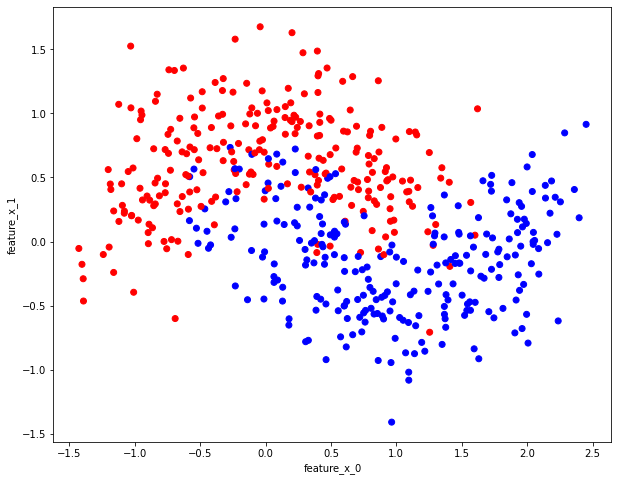

In [2]:
colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.show()


Now let's see how random forest perform on the dataset. We will use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)from sklearn.

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.872

The result is almost 90% which is not too bad

Now we want to see how ensemble learning perform. First we will build two other models: Logistic Regression and Multilayer Perceptron and then take majority votes from Logistic Regression and Multilayer Perceptron and Random Forest to decide the prediction.  
 
We will use [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html), [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from sklearn.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [5]:
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')

Train and get the majority vote

In [6]:
voting_clf.fit(X_train, y_train)

C:\Users\c\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

See how three individual models and ensemble model perform

In [7]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

LogisticRegression, accuracy score = 0.872


C:\Users\c\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier, accuracy score = 0.872
RandomForestClassifier, accuracy score = 0.872
VotingClassifier, accuracy score = 0.88


C:\Users\c\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


We see that by taking the majority vote, ensemble methods did perform the best that has the highest accuracy score.

We mention about bagging in the beginning of the notebook, here we will implement bagging on the decision tree.   
We will use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) here. 

We will draw 100 samples from X to train each base estimator, and form 500 base estimators in the ensemble.

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap = True, 
                            n_jobs = -1)

In [9]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

See how it perform on the test set.

In [10]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

The accuracy is 0.896 which is not too bad

-------------------------------
### Implementation on Different Dataset
---------------------

#### Dataset Information
The dataset we will use is Kyphosis dataset.
he kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output.

Input:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

Outputs:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


###### Our goal is to classify and predict if a kyphosis was present after the operation.

The libraries we will be using are:
* [matplotlib](https://matplotlib.org/)
* [seaborn](https://seaborn.pydata.org/)
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

Load the dataset and see what does it look like

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv('kyphosis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [13]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


#### Exploration Data Analysis   
We'll just check out a simple pairplot for this small dataset.

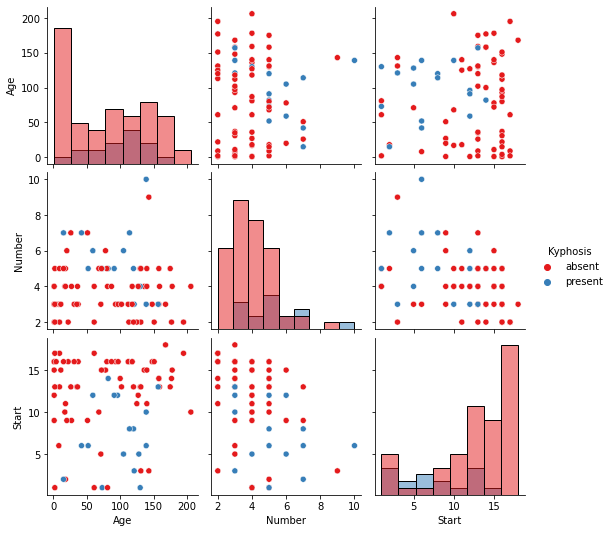

In [22]:
sns.pairplot(df,hue='Kyphosis',palette='Set1',diag_kind='hist')

Split up the data into a training set and a test set

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

We will use [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html), [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from sklearn to build an ensemble model here.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

Fit the model and train

In [29]:
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

See how three individual models and ensemble model perform

In [30]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

LogisticRegression, accuracy score = 0.88
MLPClassifier, accuracy score = 0.88


C:\Users\c\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier, accuracy score = 0.76
VotingClassifier, accuracy score = 0.84


We can see here the Logistic Regression and MLP Classifier perform better than ensemble model, and Random Forest model has the lowest accuracy.

#### Conclusion
Ensemble model works better, when we ensemble models with low correlation. And esemble method sometimes does perform worse than other individual model.

#### References:
Mel, Luca. “Kyphosis Disease Classification.” Medium, Data-Py-Blog, 18 Nov. 2019, https://medium.com/data-py-blog/kyphosis-disease-classification-fe275f05dbb5. 

“Introduction to Random Forest in Machine Learning.” Section, https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/. 
